In [76]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
import xgboost as xgb
from scipy.stats.mstats import winsorize
from sklearn.metrics import f1_score as score #Scoring metric for the competition
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
import warnings
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
sns.set_palette("Set2")
sns.set_style("ticks")

In [77]:
# https://www.kaggle.com/code/mahmoudawad112001/decision-tree-vs-random-forest-vs-xg-vs-lightgbm

In [78]:
# 파일 경로
file_path = 'C:/hkpark_/data-science-tutorial/data-science-tutorial/dataset/house_price_youngsan.txt'

# 탭으로 구분된 파일 불러오기
df = pd.read_csv(file_path, delimiter='\t', encoding='utf-8')
df.head(20)

,sigungu,dangi,area,cntr_ym,cntr_d,price,dong,floor,built_year,road_nm,trns_type,agent_gu,register_ymd
0,서울특별시 용산구 후암동,브라운스톤남산,166.980,202204,25,205000,-,2,2004,후암로 65,중개거래,서울 서초구,-
1,서울특별시 용산구 후암동,후암미주,62.280,202203,24,110000,-,2,1980,후암로 71-1,중개거래,서울 용산구,-
2,서울특별시 용산구 후암동,뉴후암,67.110,202202,12,75000,-,3,1973,후암로 71,직거래,-,-
3,서울특별시 용산구 후암동,남산애지앙,44.880,202202,7,56500,-,1,2003,후암로34길 31-17,중개거래,서울 용산구,-
4,서울특별시 용산구 후암동,후암,84.110,202111,25,65000,-,2,2002,후암로22길 10,직거래,-,-
5,서울특별시 용산구 후암동,후암맨션,72.130,202111,4,74500,-,6,1974,후암로44길 8,중개거래,서울 용산구,-
6,서울특별시 용산구 후암동,브라운스톤남산,166.560,202109,14,170000,-,3,2004,후암로 65,-,-,-
7,서울특별시 용산구 후암동,남산애지앙,44.880,202108,26,50000,-,1,2003,후암로34길 31-17,-,-,-
8,서울특별시 용산구 후암동,신후암,66.510,202107,31,53000,-,6,1971,후암로28길 10,-,-,-
9,서울특별시 용산구 후암동,화인,143.250,202106,26,120000,-,2,2002,후암로16길 27,-,-,-


결측치 확인

In [79]:
df.isnull().sum() * 100 / len(df)


sigungu         0.0
dangi           0.0
area            0.0
cntr_ym         0.0
cntr_d          0.0
price           0.0
dong            0.0
floor           0.0
built_year      0.0
road_nm         0.0
trns_type       0.0
agent_gu        0.0
register_ymd    0.0
dtype: float64

In [80]:
# df.apply(lambda x: sum(x.isnull()))

데이터형 확인

In [81]:
df.dtypes

sigungu          object
dangi            object
area            float64
cntr_ym           int64
cntr_d            int64
price             int64
dong             object
floor             int64
built_year        int64
road_nm          object
trns_type        object
agent_gu         object
register_ymd     object
dtype: object

In [82]:
df.shape

(1503, 13)

In [83]:
# 데이터의 기간
df['cntr_ym'] = df['cntr_ym'].astype(str)
df['cntr_d'] = df['cntr_d'].astype(str)

# cntr_d가 10 미만인 경우에는 앞에 '0'을 추가하여 2자리로 만듦
df['cntr_d'] = df['cntr_d'].apply(lambda x: x.zfill(2))

# cntr_ymd 변수를 생성 (cntr_ym과 cntr_d 결합)
df['cntr_ymd'] = df['cntr_ym'] + df['cntr_d']

df['cntr_ymd'].min()
df['cntr_ymd'].max()

# df['cntr_ymd'] = df['cntr_ym'] + df['cntr_d_1']

# # df.head()
min_cntr_ymd = df['cntr_ymd'].min()
max_cntr_ymd = df['cntr_ymd'].max()

print("Minimum value of 'cntr_ymd':", min_cntr_ymd)
print("Maximum value of 'cntr_ymd':", max_cntr_ymd)
df.head(20)

Minimum value of 'cntr_ymd': 20210525
Maximum value of 'cntr_ymd': 20240520


,sigungu,dangi,area,cntr_ym,cntr_d,price,dong,floor,built_year,road_nm,trns_type,agent_gu,register_ymd,cntr_ymd
0,서울특별시 용산구 후암동,브라운스톤남산,166.980,202204,25,205000,-,2,2004,후암로 65,중개거래,서울 서초구,-,20220425
1,서울특별시 용산구 후암동,후암미주,62.280,202203,24,110000,-,2,1980,후암로 71-1,중개거래,서울 용산구,-,20220324
2,서울특별시 용산구 후암동,뉴후암,67.110,202202,12,75000,-,3,1973,후암로 71,직거래,-,-,20220212
3,서울특별시 용산구 후암동,남산애지앙,44.880,202202,07,56500,-,1,2003,후암로34길 31-17,중개거래,서울 용산구,-,20220207
4,서울특별시 용산구 후암동,후암,84.110,202111,25,65000,-,2,2002,후암로22길 10,직거래,-,-,20211125
5,서울특별시 용산구 후암동,후암맨션,72.130,202111,04,74500,-,6,1974,후암로44길 8,중개거래,서울 용산구,-,20211104
6,서울특별시 용산구 후암동,브라운스톤남산,166.560,202109,14,170000,-,3,2004,후암로 65,-,-,-,20210914
7,서울특별시 용산구 후암동,남산애지앙,44.880,202108,26,50000,-,1,2003,후암로34길 31-17,-,-,-,20210826
8,서울특별시 용산구 후암동,신후암,66.510,202107,31,53000,-,6,1971,후암로28길 10,-,-,-,20210731
9,서울특별시 용산구 후암동,화인,143.250,202106,26,120000,-,2,2002,후암로16길 27,-,-,-,20210626


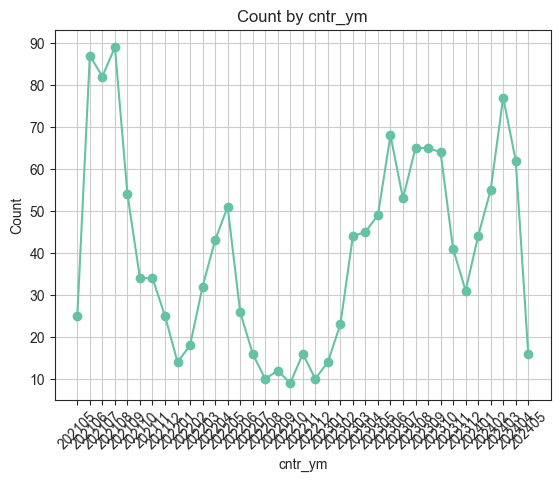

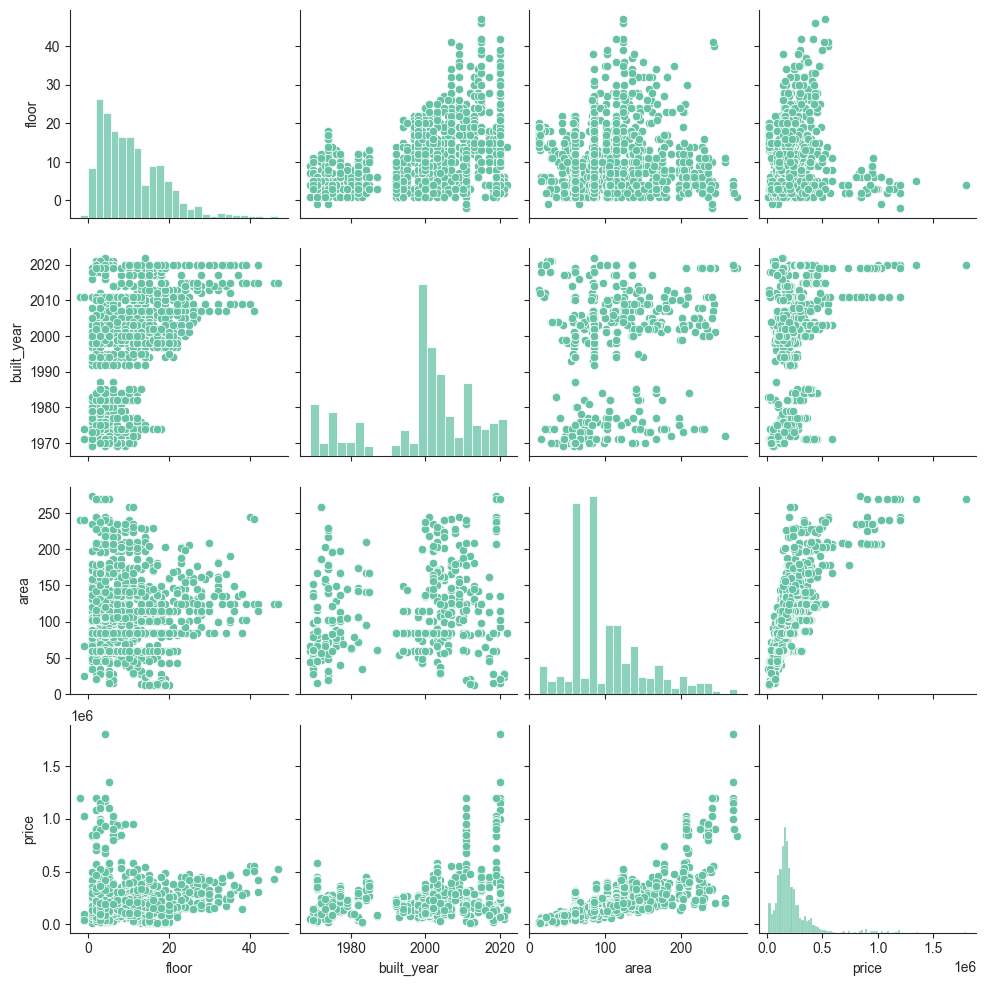

               floor  built_year      area     price
floor       1.000000    0.384815  0.009754  0.013677
built_year  0.384815    1.000000  0.022555  0.185937
area        0.009754    0.022555  1.000000  0.745884
price       0.013677    0.185937  0.745884  1.000000


In [84]:
# 거래월별 거래건수 : 라인차트
# 'cntr_ym' 열의 각 값의 건수를 구하기
count_by_cntr_ym = df['cntr_ym'].value_counts().sort_index()

# 라인 차트 그리기
plt.plot(count_by_cntr_ym.index, count_by_cntr_ym.values, marker='o')
plt.xlabel('cntr_ym')
plt.ylabel('Count')
plt.title('Count by cntr_ym')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(True)  # 그리드 표시
plt.show()

# ['floor','built_year','area'] vs price : 산점도
# ['floor','built_year','area'] vs price : 상관계수
# 'floor', 'built_year', 'area', 'price' 열 선택
selected_columns = ['floor', 'built_year', 'area', 'price']
selected_df = df[selected_columns]

# 산점도 그리기
sns.pairplot(selected_df)
plt.show()

# 상관 계수 계산
correlation_matrix = selected_df.corr()
print(correlation_matrix)

In [85]:
# 평형대(area_pyeong) : area 변수의 3.3 m2 를 나눠서 평으로 환산, 평형 구분 할 것
df['area_pyeong'] =round(df.area/3.3,1) #평으로 환산
df['area_pyeong_cls']=(df.area//33)*10 #평형대으로 환산 : 10의 자리에서 버림 ( // 연산자는 나눗셈 후 소수점 이하를 버리는 연산자 )

# area_pyeong_cls_adj 변수 생성
def classify_area_pyeong(area_pyeong_cls):
    if area_pyeong_cls < 10:
        return '10평미만'
    elif area_pyeong_cls < 20:
        return '10평대'
    elif area_pyeong_cls < 30:
        return '20평대'
    elif area_pyeong_cls < 40:
        return '30평대'
    elif area_pyeong_cls < 50:
        return '40평대'
    else:
        return '50평대이상'

df['area_pyeong_cls_adj'] = df['area_pyeong_cls'].apply(classify_area_pyeong)

df['cntr_ym_str']=df['cntr_ym'].astype(str)
df['cntr_y']=df['cntr_ym_str'].str[:4].astype(int)


df['cntr_m']=df['cntr_ym_str'].str[-2:]

df['age']=df['cntr_y']-df['built_year'] #계약년월-건축년도

df['age_cls_10'] = df['age'].apply(lambda x: 1 if x < 10 else 0) #10년이내
df['age_cls_20'] = df['age'].apply(lambda x: 1 if x >= 10 and x <20 else 0) 
df['age_cls_30'] = df['age'].apply(lambda x: 1 if x >= 20 and x <30 else 0) 
df['age_cls_40'] = df['age'].apply(lambda x: 1 if x >= 30 and x <40 else 0) 
df['age_cls_40_over'] = df['age'].apply(lambda x: 1 if x >= 40 else 0) 

df['floor_indicator'] = df['floor'].apply(lambda x: 1 if x == 1 else 0)
df['trns_type_직거래'] = df['trns_type'].apply(lambda x: 1 if x == '직거래' else 0)# 직거래여부

# age_cls 변수 생성
def classify_age(age):
    if age < 10:
        return 1
    elif age < 20:
        return 2
    elif age < 30:
        return 3
    elif age < 40:
        return 4
    else:
        return '4+'

df['age_cls'] = df['age'].apply(classify_age)

# 동 변수(sigungu_dong) : sigungu에서 11번째 자리부터 뒤에 쭉
df['sigungu_dong'] = df['sigungu'].str[10:]
df.head()
# selected_df=df[['area','area_pyeong','area_pyeong_cls','floor','floor_indicator','cntr_ym','cntr_y'
#                 ,'built_year','age','age_cls_10','age_cls_20','age_cls_30','age_cls_40','age_cls_40_over','age_cls','sigungu','sigungu_dong','trns_type_직거래','trns_type']]
# selected_df.iloc[10:21, ]



,sigungu,dangi,area,cntr_ym,cntr_d,price,dong,floor,built_year,road_nm,trns_type,agent_gu,register_ymd,cntr_ymd,area_pyeong,area_pyeong_cls,area_pyeong_cls_adj,cntr_ym_str,cntr_y,cntr_m,age,age_cls_10,age_cls_20,age_cls_30,age_cls_40,age_cls_40_over,floor_indicator,trns_type_직거래,age_cls,sigungu_dong
0,서울특별시 용산구 후암동,브라운스톤남산,166.98,202204,25,205000,-,2,2004,후암로 65,중개거래,서울 서초구,-,20220425,50.6,50.0,50평대이상,202204,2022,04,18,0,1,0,0,0,0,0,2,후암동
1,서울특별시 용산구 후암동,후암미주,62.28,202203,24,110000,-,2,1980,후암로 71-1,중개거래,서울 용산구,-,20220324,18.9,10.0,10평대,202203,2022,03,42,0,0,0,0,1,0,0,4+,후암동
2,서울특별시 용산구 후암동,뉴후암,67.11,202202,12,75000,-,3,1973,후암로 71,직거래,-,-,20220212,20.3,20.0,20평대,202202,2022,02,49,0,0,0,0,1,0,1,4+,후암동
3,서울특별시 용산구 후암동,남산애지앙,44.88,202202,07,56500,-,1,2003,후암로34길 31-17,중개거래,서울 용산구,-,20220207,13.6,10.0,10평대,202202,2022,02,19,0,1,0,0,0,1,0,2,후암동
4,서울특별시 용산구 후암동,후암,84.11,202111,25,65000,-,2,2002,후암로22길 10,직거래,-,-,20211125,25.5,20.0,20평대,202111,2021,11,19,0,1,0,0,0,0,1,2,후암동


In [86]:
# 'cntr_ym', 'sigungu_dong'조합별 건수 계산
count_by_cntr_ym_dong = df.groupby(['cntr_ym', 'sigungu_dong']).size().unstack(fill_value=0)
count_by_cntr_ym_dong

sigungu_dong,갈월동,도원동,동빙고동,동자동,문배동,보광동,산천동,서빙고동,신계동,신창동,용문동,용산동2가,용산동5가,원효로1가,원효로3가,원효로4가,이촌동,이태원동,청암동,청파동1가,청파동3가,한강로1가,한강로2가,한강로3가,한남동,효창동,후암동
cntr_ym,,,,,,,,,,,,,,,,,,,,,,,,,,,
202105,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,13,0,0,0,0,0,0,2,5,0,1
202106,0,3,0,0,4,1,3,3,1,2,1,0,2,3,0,8,29,3,0,0,0,1,2,2,9,9,1
202107,0,3,0,0,3,2,5,3,2,0,1,0,4,2,0,4,28,2,0,0,0,2,2,2,10,6,1
202108,0,5,0,1,8,1,3,0,4,1,1,0,2,4,0,4,24,0,3,0,0,2,1,6,10,8,1
202109,0,2,0,1,5,1,4,0,2,0,0,0,2,0,0,2,17,0,0,0,0,2,2,2,9,2,1
202110,0,3,0,1,2,0,2,1,0,0,0,0,2,0,0,1,11,1,0,0,0,1,1,2,4,2,0
202111,0,0,0,0,2,1,1,1,4,0,0,0,0,0,0,1,10,2,0,0,0,0,1,1,6,2,2
202112,0,1,0,0,5,0,2,0,0,0,1,0,2,0,0,0,2,1,0,0,0,2,0,1,7,1,0
202201,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,8,2,0,0,0,0,0,1,1,0,0


In [87]:
# 'cntr_ym', 'sigungu_dong'조합별 건수 계산
count_by_sigungu_dong = df.groupby(['sigungu_dong']).size()
count_by_sigungu_dong

sigungu_dong
갈월동        1
도원동       65
동빙고동       3
동자동       15
문배동       82
보광동       30
산천동       54
서빙고동      30
신계동       30
신창동        3
용문동       10
용산동2가      4
용산동5가     24
원효로1가     29
원효로3가      1
원효로4가     47
이촌동      565
이태원동      79
청암동       10
청파동1가      1
청파동3가      2
한강로1가     28
한강로2가     33
한강로3가     82
한남동      172
효창동       72
후암동       31
dtype: int64

<Figure size 1000x600 with 0 Axes>

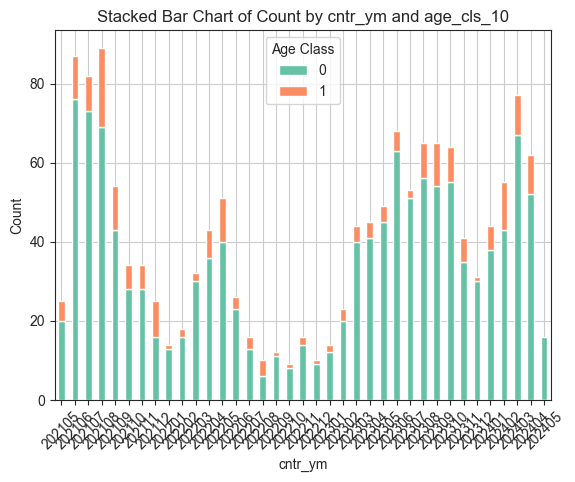

In [88]:
# 'cntr_ym'과 'age_cls' 조합별 건수 계산
count_by_cntr_ym_age = df.groupby(['cntr_ym', 'age_cls_10']).size().unstack(fill_value=0)

# 스택된 막대 그래프 그리기
plt.figure(figsize=(10, 6))
count_by_cntr_ym_age.plot(kind='bar', stacked=True)
plt.xlabel('cntr_ym')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Count by cntr_ym and age_cls_10')
plt.legend(title='Age Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

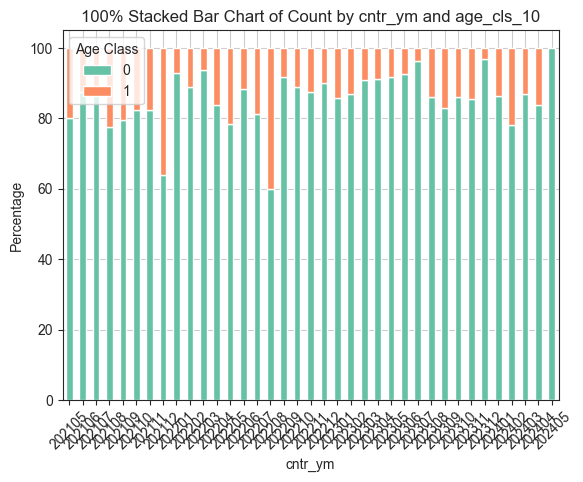

In [89]:
# 'cntr_ym'과 'age_cls' 조합별 건수 계산 
count_by_cntr_ym_age = df.groupby(['cntr_ym', 'age_cls_10']).size().unstack(fill_value=0) #fill_value=0 매개변수는 결측값이 있을 경우 이를 0으로 채우도록

# 각 행을 전체 합으로 나누어서 백분율로 변환
count_by_cntr_ym_age_percent = count_by_cntr_ym_age.div(count_by_cntr_ym_age.sum(axis=1), axis=0) * 100

# 100% 스택된 막대 그래프 그리기
plt.figure(figsize=(10, 6))
count_by_cntr_ym_age_percent.plot(kind='bar', stacked=True)
plt.xlabel('cntr_ym')
plt.ylabel('Percentage')
plt.title('100% Stacked Bar Chart of Count by cntr_ym and age_cls_10')
plt.legend(title='Age Class', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

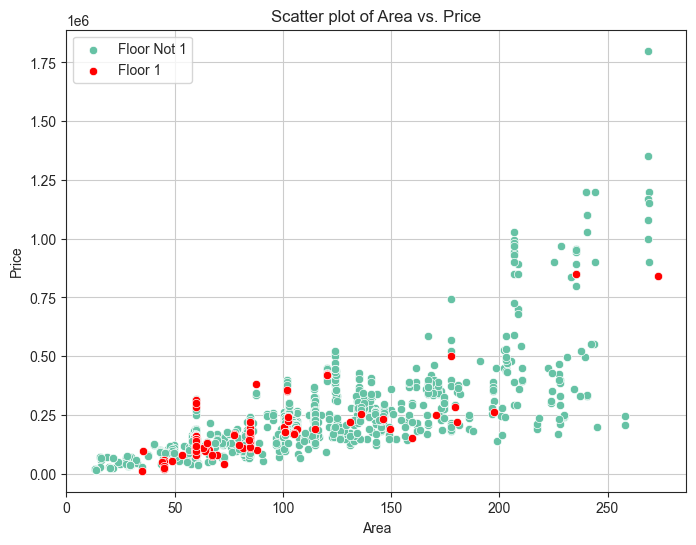

In [90]:
# floor가 1인 경우와 아닌 경우를 구분하여 데이터프레임 필터링
floor_1_df = df[df['floor'] == 1]
floor_not_1_df = df[df['floor'] != 1]

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=floor_not_1_df, x='area', y='price', label='Floor Not 1')
sns.scatterplot(data=floor_1_df, x='area', y='price', label='Floor 1', color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter plot of Area vs. Price')
plt.legend()
plt.grid(True)
plt.show()

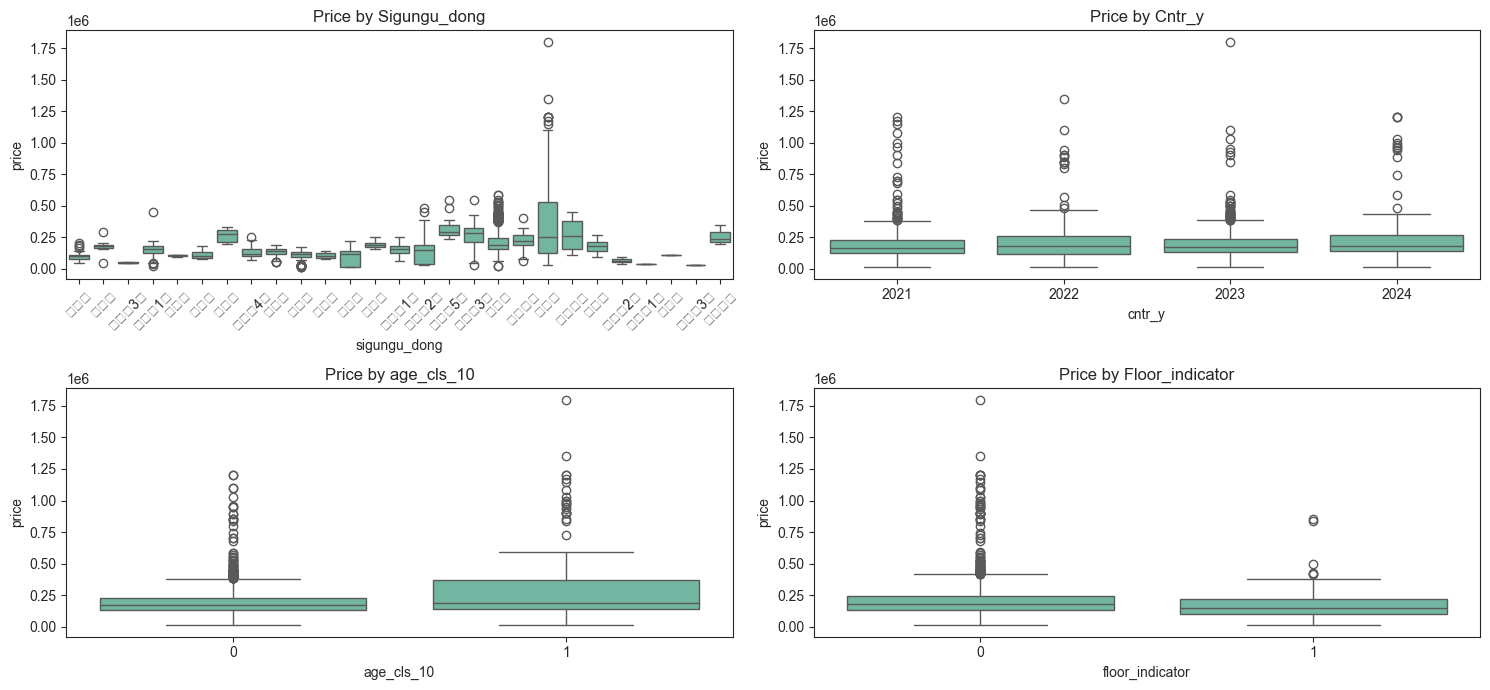

In [91]:
# 서브플롯 설정
# fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# Box plot 그리기
sns.boxplot(x='sigungu_dong', y='price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Price by Sigungu_dong')
axes[0, 0].tick_params(axis='x', rotation=45) # x축 눈금의 각도를 45도로 설정

sns.boxplot(x='cntr_y', y='price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Price by Cntr_y')

sns.boxplot(x='age_cls_10', y='price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Price by age_cls_10')

sns.boxplot(x='floor_indicator', y='price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Price by Floor_indicator')

# sns.boxplot(x='trns_type_직거래', y='price', data=df, ax=axes[2, 0])
# axes[1, 0].set_title('Price by trns_type_직거래')

# sns.boxplot(x='cntr_y', y='price', data=df, ax=axes[2, 1])
# axes[1, 1].set_title('Price by cntr_y')

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [92]:
# 각 값의 비율 계산
value_counts = df['sigungu_dong'].value_counts(normalize=True)#비율계산

# 5% 이상인 값을 유지하고, 그렇지 않은 값을 '기타'로 대체
threshold = 0.03
df['sigungu_dong_adj'] = df['sigungu_dong'].apply(lambda x: x if value_counts[x] >= threshold else '기타')

df.head()


,sigungu,dangi,area,cntr_ym,cntr_d,price,dong,floor,built_year,road_nm,trns_type,agent_gu,register_ymd,cntr_ymd,area_pyeong,area_pyeong_cls,area_pyeong_cls_adj,cntr_ym_str,cntr_y,cntr_m,age,age_cls_10,age_cls_20,age_cls_30,age_cls_40,age_cls_40_over,floor_indicator,trns_type_직거래,age_cls,sigungu_dong,sigungu_dong_adj
0,서울특별시 용산구 후암동,브라운스톤남산,166.98,202204,25,205000,-,2,2004,후암로 65,중개거래,서울 서초구,-,20220425,50.6,50.0,50평대이상,202204,2022,04,18,0,1,0,0,0,0,0,2,후암동,기타
1,서울특별시 용산구 후암동,후암미주,62.28,202203,24,110000,-,2,1980,후암로 71-1,중개거래,서울 용산구,-,20220324,18.9,10.0,10평대,202203,2022,03,42,0,0,0,0,1,0,0,4+,후암동,기타
2,서울특별시 용산구 후암동,뉴후암,67.11,202202,12,75000,-,3,1973,후암로 71,직거래,-,-,20220212,20.3,20.0,20평대,202202,2022,02,49,0,0,0,0,1,0,1,4+,후암동,기타
3,서울특별시 용산구 후암동,남산애지앙,44.88,202202,07,56500,-,1,2003,후암로34길 31-17,중개거래,서울 용산구,-,20220207,13.6,10.0,10평대,202202,2022,02,19,0,1,0,0,0,1,0,2,후암동,기타
4,서울특별시 용산구 후암동,후암,84.11,202111,25,65000,-,2,2002,후암로22길 10,직거래,-,-,20211125,25.5,20.0,20평대,202111,2021,11,19,0,1,0,0,0,0,1,2,후암동,기타


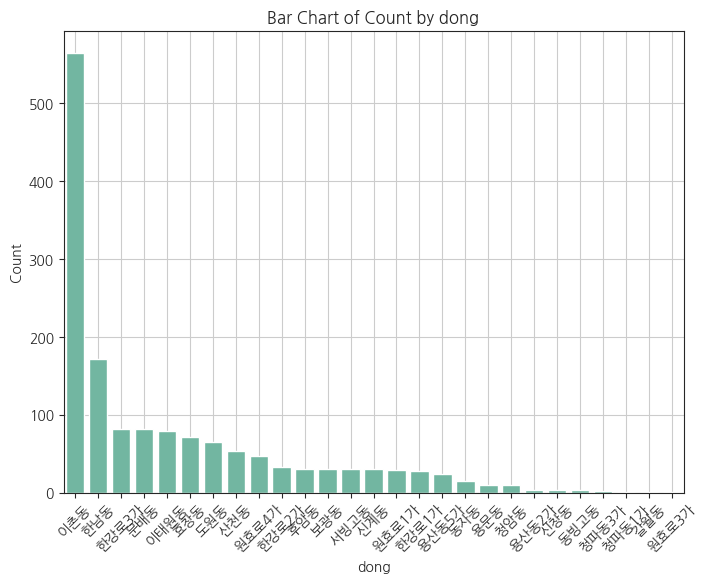

In [93]:
# 'dong' 변수별 건수 추출
count_by_dong = df['sigungu_dong'].value_counts()
# sigungu_dong_adj

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 막대 차트 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x=count_by_dong.index, y=count_by_dong.values)
plt.xlabel('dong')
plt.ylabel('Count')
plt.title('Bar Chart of Count by dong')

# x축 눈금의 각도를 45도로 설정
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

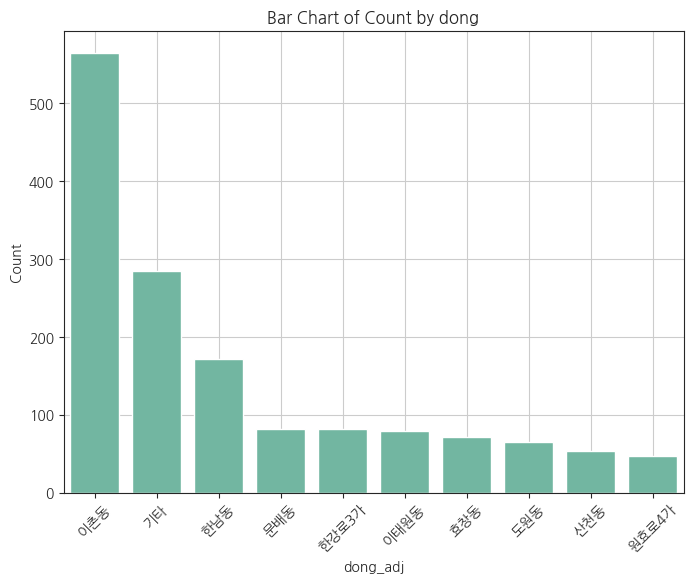

In [94]:
# 'dong' 변수별 건수 추출
count_by_dong_adj = df['sigungu_dong_adj'].value_counts()
# 

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 막대 차트 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x=count_by_dong_adj.index, y=count_by_dong_adj.values)
plt.xlabel('dong_adj')
plt.ylabel('Count')
plt.title('Bar Chart of Count by dong')

# x축 눈금의 각도를 45도로 설정
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

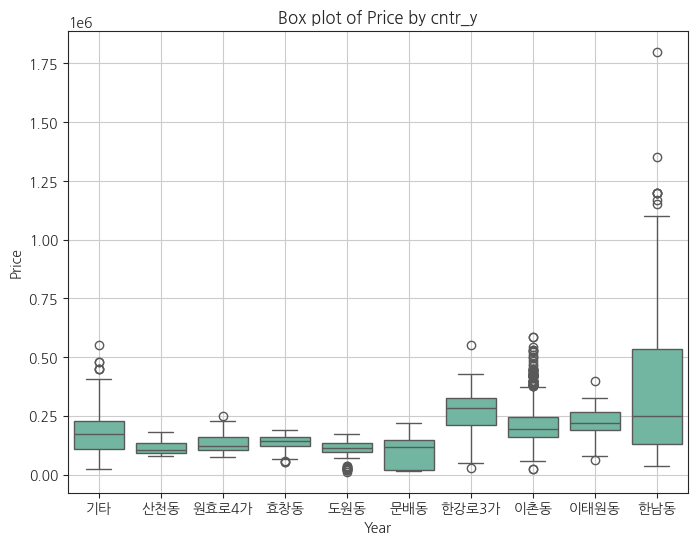

In [95]:
# 'cntr_y'별 'price'의 상자그림(box plot) 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sigungu_dong_adj', y='price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Box plot of Price by cntr_y')
plt.grid(True)
plt.show()

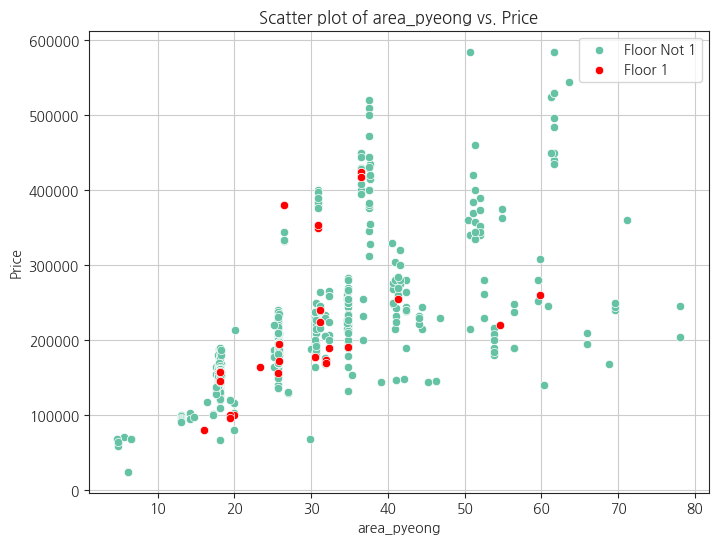

In [96]:
# 이촌동만 filter해서 
filtered_dong=df[df['sigungu_dong']=='이촌동']

# floor가 1인 경우와 아닌 경우를 구분하여 데이터프레임 필터링
floor_1_df = filtered_dong[df['floor'] == 1]
floor_not_1_df = filtered_dong[df['floor'] != 1]

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(data=floor_not_1_df, x='area_pyeong', y='price', label='Floor Not 1')
sns.scatterplot(data=floor_1_df, x='area_pyeong', y='price', label='Floor 1', color='red')
plt.xlabel('area_pyeong')
plt.ylabel('Price')
plt.title('Scatter plot of area_pyeong vs. Price')
plt.legend()
plt.grid(True)
plt.show()

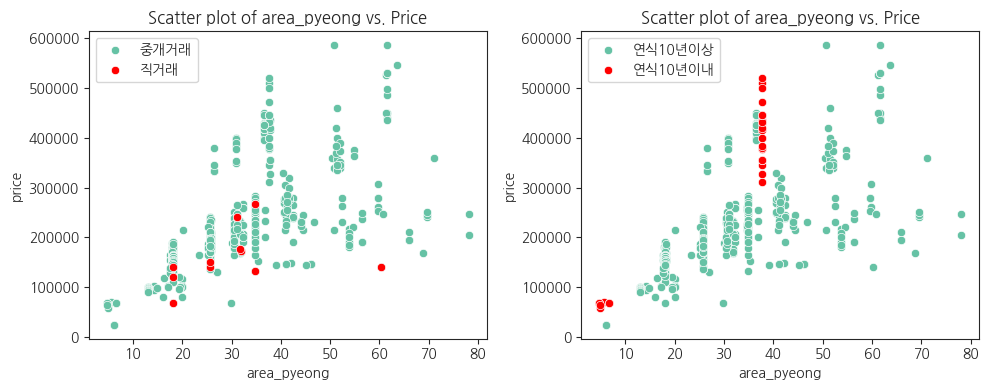

In [97]:
# 이촌동만 filter해서 
filtered_dong=df[df['sigungu_dong']=='이촌동']

# floor가 1인 경우와 아닌 경우를 구분하여 데이터프레임 필터링
dir_df = filtered_dong[df['trns_type'] == '직거래']
dir_not_df = filtered_dong[df['floor'] != '직거래']

# 1x2 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Box plot 그리기
sns.scatterplot(data=dir_not_df, x='area_pyeong', y='price', label='중개거래', ax=axes[0])
sns.scatterplot(data=dir_df, x='area_pyeong', y='price', label='직거래', color='red', ax=axes[0])
axes[0].set_title('Scatter plot of area_pyeong vs. Price')

# floor가 1인 경우와 아닌 경우를 구분하여 데이터프레임 필터링
age_cls_1_df = filtered_dong[df['age_cls_10'] == 1]
age_cls_not_1_df = filtered_dong[df['age_cls_10'] != 1]


# Box plot 그리기
sns.scatterplot(data=age_cls_not_1_df, x='area_pyeong', y='price', label='연식10년이상', ax=axes[1])
sns.scatterplot(data=age_cls_1_df, x='area_pyeong', y='price', label='연식10년이내', color='red', ax=axes[1])
axes[1].set_title('Scatter plot of area_pyeong vs. Price')


# 레이아웃 조정
plt.tight_layout()
plt.show()

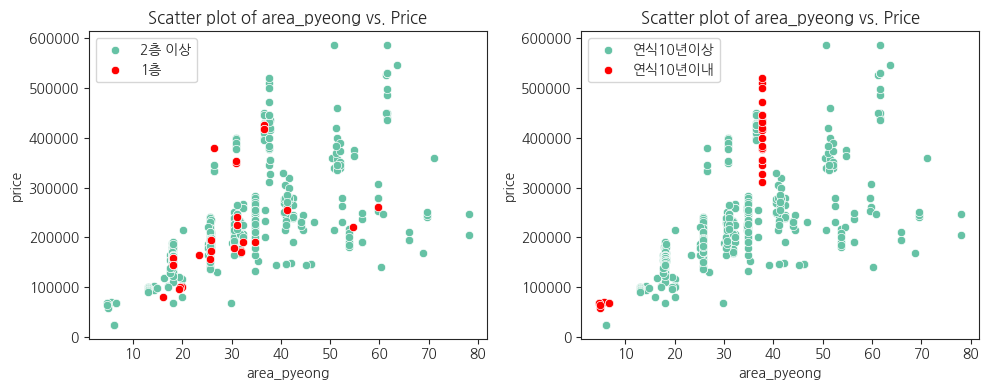

In [98]:

# 이촌동만 filter해서 
filtered_dong=df[df['sigungu_dong']=='이촌동']

# floor가 1인 경우와 아닌 경우를 구분하여 데이터프레임 필터링
floor_1_df = filtered_dong[df['floor'] == 1]
floor_not_1_df = filtered_dong[df['floor'] != 1]

# 1x2 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Box plot 그리기
sns.scatterplot(data=floor_not_1_df, x='area_pyeong', y='price', label='2층 이상', ax=axes[0])
sns.scatterplot(data=floor_1_df, x='area_pyeong', y='price', label='1층', color='red', ax=axes[0])
axes[0].set_title('Scatter plot of area_pyeong vs. Price')

# floor가 1인 경우와 아닌 경우를 구분하여 데이터프레임 필터링
age_cls_1_df = filtered_dong[df['age_cls_10'] == 1]
age_cls_not_1_df = filtered_dong[df['age_cls_10'] != 1]


# Box plot 그리기
sns.scatterplot(data=age_cls_not_1_df, x='area_pyeong', y='price', label='연식10년이상', ax=axes[1])
sns.scatterplot(data=age_cls_1_df, x='area_pyeong', y='price', label='연식10년이내', color='red', ax=axes[1])
axes[1].set_title('Scatter plot of area_pyeong vs. Price')


# 레이아웃 조정
plt.tight_layout()
plt.show()

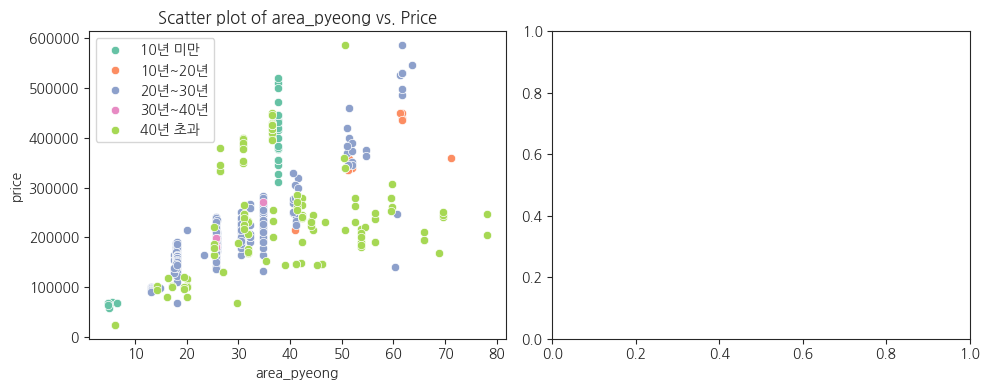

In [99]:

# 이촌동만 filter해서 
filtered_dong=df[df['sigungu_dong']=='이촌동']

# floor가 1인 경우와 아닌 경우를 구분하여 데이터프레임 필터링
age_cls_10 = filtered_dong[df['age_cls_10'] == 1]
age_cls_20 = filtered_dong[df['age_cls_20'] == 1]
age_cls_30 = filtered_dong[df['age_cls_30'] == 1]
age_cls_40 = filtered_dong[df['age_cls_40'] == 1]
age_cls_40_over = filtered_dong[df['age_cls_40_over'] == 1]

sns.color_palette("deep")

# 1x2 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Box plot 그리기
sns.scatterplot(data=age_cls_10, x='area_pyeong', y='price', label='10년 미만', ax=axes[0])
sns.scatterplot(data=age_cls_20, x='area_pyeong', y='price', label='10년~20년', ax=axes[0])
sns.scatterplot(data=age_cls_30, x='area_pyeong', y='price', label='20년~30년', ax=axes[0])
sns.scatterplot(data=age_cls_40, x='area_pyeong', y='price', label='30년~40년', ax=axes[0])
sns.scatterplot(data=age_cls_40_over, x='area_pyeong', y='price', label='40년 초과', ax=axes[0])
axes[0].set_title('Scatter plot of area_pyeong vs. Price')


# 레이아웃 조정
plt.tight_layout()
plt.show()

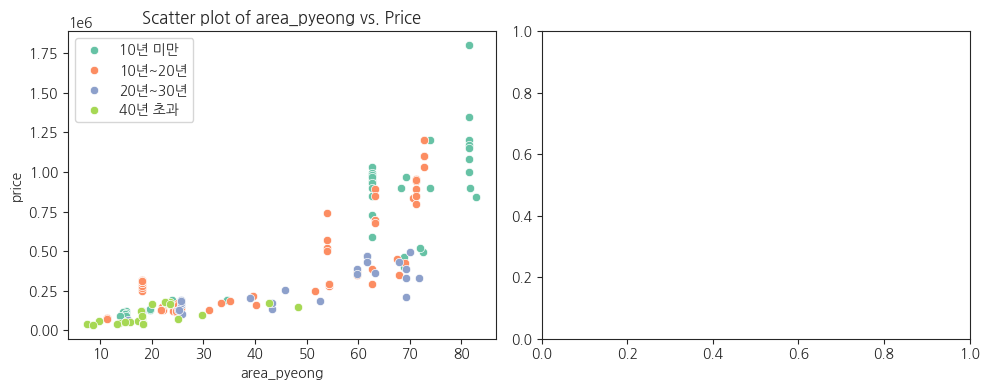

In [100]:
# 이촌동만 filter해서 
filtered_dong=df[df['sigungu_dong']=='한남동']

# floor가 1인 경우와 아닌 경우를 구분하여 데이터프레임 필터링
age_cls_10 = filtered_dong[df['age_cls_10'] == 1]
age_cls_20 = filtered_dong[df['age_cls_20'] == 1]
age_cls_30 = filtered_dong[df['age_cls_30'] == 1]
age_cls_40 = filtered_dong[df['age_cls_40'] == 1]
age_cls_40_over = filtered_dong[df['age_cls_40_over'] == 1]

sns.color_palette("deep")

# 1x2 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Box plot 그리기
sns.scatterplot(data=age_cls_10, x='area_pyeong', y='price', label='10년 미만', ax=axes[0])
sns.scatterplot(data=age_cls_20, x='area_pyeong', y='price', label='10년~20년', ax=axes[0])
sns.scatterplot(data=age_cls_30, x='area_pyeong', y='price', label='20년~30년', ax=axes[0])
sns.scatterplot(data=age_cls_40, x='area_pyeong', y='price', label='30년~40년', ax=axes[0])
sns.scatterplot(data=age_cls_40_over, x='area_pyeong', y='price', label='40년 초과', ax=axes[0])
axes[0].set_title('Scatter plot of area_pyeong vs. Price')


# 레이아웃 조정
plt.tight_layout()
plt.show()

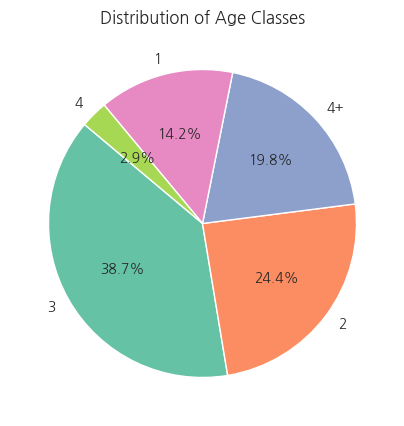

In [106]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# price_cls 값의 분포에 대한 파이차트 그리기
price_cls_counts = df['age_cls'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(price_cls_counts, labels=price_cls_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Classes')
plt.show()

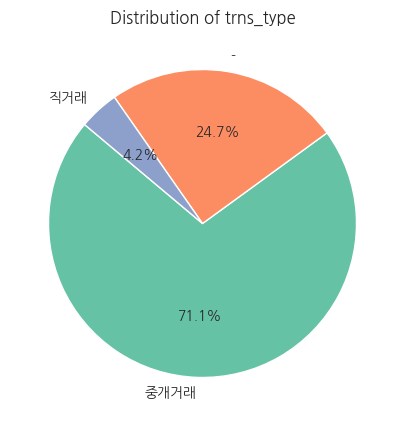

In [107]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# price_cls 값의 분포에 대한 파이차트 그리기
price_cls_counts = df['trns_type'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(price_cls_counts, labels=price_cls_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of trns_type')
plt.show()

In [101]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor, plot_tree
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error

# import matplotlib.pyplot as plt


# # 학습(train)과 테스트(test) 세트로 나누기
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# # # Decision Tree Regressor 모델 생성
# # model = DecisionTreeRegressor(random_state=42,max_depth=10)

# # # 모델 학습
# # model.fit(X_train, y_train)

# # # 예측
# # y_pred = model.predict(X_test)

# # # 모델 평가
# # mape, mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)
# # print("MAPE:", mape)
# # print("RMSE:", rmse)
# # print("MAE:", mae)
# # print("R^2:", r2)


# # # Decision Tree 그래프 출력
# # plt.figure(figsize=(20,10))
# # plot_tree(model, feature_names=X.columns, filled=True, fontsize=10)
# # plt.show()


In [102]:
# Feature Importance 계산
# feature_importance = pd.Series(model.feature_importances_, index=X.columns)
# # Feature Importance를 내림차순 정렬
# feature_importance_sorted = feature_importance.sort_values(ascending=True)

# # 정렬된 Feature Importance 출력
# print("Sorted Feature Importance:")
# print(feature_importance_sorted)

# # Feature Importance 시각화
# plt.figure(figsize=(8, 6))
# feature_importance_sorted.plot(kind='barh')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance')
# plt.show()

In [103]:
# from sklearn.linear_model import LinearRegression

# # 훈련 데이터와 테스트 데이터 분리
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Linear Regression 모델 생성 및 훈련
# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# # 모델 평가
# mape, mse, rmse, mae, r2 = evaluate_model(y_test, y_pred)

In [104]:

# # XGBoost 모델 학습 및 평가
# xgb_model = xgb.XGBRegressor()
# xgb_model.fit(X_train, y_train)
# y_pred_xgb = xgb_model.predict(X_test)
# mape_xgb, mse_xgb, rmse_xgb, mae_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
# print("XGBoost - MAPE:", mape_xgb)
# print("XGBoost - RMSE:", rmse_xgb)
# print("XGBoost - MAE:", mae_xgb)
# print("XGBoost - R^2:", r2_xgb)

# # LightGBM 모델 학습 및 평가
# lgb_model = lgb.LGBMRegressor()
# lgb_model.fit(X_train, y_train)
# y_pred_lgb = lgb_model.predict(X_test)
# mape_lgb, mse_lgb, rmse_lgb, mae_lgb, r2_lgb = evaluate_model(y_test, y_pred_lgb)
# print("LightGBM - MAPE:", mape_lgb)
# print("LightGBM - RMSE:", rmse_lgb)
# print("LightGBM - MAE:", mae_lgb)
# print("LightGBM - R^2:", r2_lgb)

# # CatBoost 모델 학습 및 평가
# cb_model = cb.CatBoostRegressor()
# cb_model.fit(X_train, y_train)
# y_pred_cb = cb_model.predict(X_test)
# mape_cb, mse_cb, rmse_cb, mae_cb, r2_cb = evaluate_model(y_test, y_pred_cb)
# print("CatBoost - MAPE:", mape_cb)
# print("CatBoost - RMSE:", rmse_cb)
# print("CatBoost - MAE:", mae_cb)
# print("CatBoost - R^2:", r2_cb)

In [105]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LinearRegression
# import xgboost as xgb
# import lightgbm as lgb
# import catboost as cb
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # 각 모델 학습 및 평가
# models = {
#     'DecisionTree': DecisionTreeRegressor(),
#     'LinearRegression': LinearRegression(),
#     'XGBoost': xgb.XGBRegressor(),
#     'LightGBM': lgb.LGBMRegressor(),
#     'CatBoost': cb.CatBoostRegressor()
# }

# results = {}
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     results[name] = evaluate_model(y_test, y_pred)

# # 결과를 DataFrame으로 변환
# results_df = pd.DataFrame(results, index=['MAPE', 'RMSE', 'MAE', 'R^2'])

# # 결과를 CSV 파일로 저장
# results_df.to_csv('model_evaluation_results.csv')

# print(results_df)
# print("Results saved to model_evaluation_results.csv")